In [80]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [81]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/AV-Mobility/master/train_Wc8LBpr.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/AV-Mobility/master/test_VsU9xXK.csv')
#Reading sample submission file:
sample_sub = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/AV-Mobility/master/sample_submission_NoPBkjr.csv')

In [82]:
sc=StandardScaler()
mm=MinMaxScaler(feature_range=(1,4), copy=True)
ohe = OneHotEncoder(sparse=False)
le=LabelEncoder()

In [83]:
train

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


In [84]:
test

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87390,T0005908503,29.43,C,3.0,2.40720,C,A,0.99750,0,74.0,48,72,Female
87391,T0005908504,14.83,C,10.0,2.57009,A,D,4.74375,0,109.0,42,60,Female
87392,T0005908505,37.86,A,6.0,3.08227,C,A,1.63500,0,NaN,57,77,Male
87393,T0005908511,10.63,C,1.0,NaN,NaN,J,2.59875,1,107.0,51,77,Male


In [85]:
sample_sub

,Trip_ID,Surge_Pricing_Type
0,T0005689459,2
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2
...,...,...
87390,T0005908503,2
87391,T0005908504,2
87392,T0005908505,2
87393,T0005908511,2


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  74237 non-null  object 
 3   Customer_Since_Months        83429 non-null  float64
 4   Life_Style_Index             74068 non-null  float64
 5   Confidence_Life_Style_Index  74068 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var1                         40606 non-null  float64
 10  Var2                         87395 non-null  int64  
 11  Var3                         87395 non-null  int64  
 12  Gender                       87395 non-null  object 
dtypes: float64(5), i

In [88]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [89]:
test.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [90]:
#fill up missing values
#fill up missing values with median
train['Type_of_Cab'] = train['Type_of_Cab'].fillna('C')
test['Type_of_Cab'] = test['Type_of_Cab'].fillna('C')

train['Customer_Since_Months'] = train['Customer_Since_Months'].fillna(10)
test['Customer_Since_Months'] = test['Customer_Since_Months'].fillna(10)

train['Life_Style_Index'] = train['Life_Style_Index'].fillna(train['Life_Style_Index'].median())
test['Life_Style_Index'] = test['Life_Style_Index'].fillna(test['Life_Style_Index'].median())

train['Confidence_Life_Style_Index'] = train['Confidence_Life_Style_Index'].fillna('C')
test['Confidence_Life_Style_Index'] = test['Confidence_Life_Style_Index'].fillna('C')

train['Var1'] = train['Var1'].fillna(train['Var1'].mode()[0])
test['Var1'] = test['Var1'].fillna(train['Var1'].mode()[0])

In [91]:
#convert floats to integers
train.Customer_Since_Months=train.Customer_Since_Months.astype(int)
test.Customer_Since_Months=test.Customer_Since_Months.astype(int)

train.Var1=train.Var1.astype(int)
test.Var1=test.Var1.astype(int)

In [92]:
train

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1,2.42769,A,A,3.90500,0,40,46,60,Female,2
1,T0005689461,29.47,B,10,2.78245,B,A,3.45000,0,38,56,78,Male,2
2,T0005689464,41.58,C,10,2.79805,C,E,3.50125,2,39,56,77,Male,2
3,T0005689465,61.56,C,10,2.79805,C,A,3.45375,0,39,52,74,Male,3
4,T0005689467,54.95,C,10,3.03453,B,A,3.40250,4,51,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1,2.74229,A,A,3.28500,0,61,47,76,Male,3
131658,T0005908510,74.81,C,7,2.81059,C,A,0.44500,0,39,63,88,Male,2
131659,T0005908512,40.17,C,10,2.99565,B,A,3.33625,0,39,48,75,Female,2
131660,T0005908513,46.88,B,4,3.04744,A,B,4.15750,1,47,54,79,Male,2


In [93]:
test

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10,2.57438,A,B,3.68000,2,39,46,63,Male
1,T0005689462,32.15,B,10,2.85143,A,A,1.59375,0,65,49,80,Female
2,T0005689463,10.38,C,4,2.70530,A,D,4.50500,0,39,47,74,Male
3,T0005689466,14.94,C,6,2.48159,C,E,4.53000,0,63,43,54,Male
4,T0005689468,32.03,B,7,2.81598,A,K,4.60125,3,96,44,56,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87390,T0005908503,29.43,C,3,2.40720,C,A,0.99750,0,74,48,72,Female
87391,T0005908504,14.83,C,10,2.57009,A,D,4.74375,0,109,42,60,Female
87392,T0005908505,37.86,A,6,3.08227,C,A,1.63500,0,39,57,77,Male
87393,T0005908511,10.63,C,1,2.79863,C,J,2.59875,1,107,51,77,Male


In [94]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [95]:
segment=train.groupby('Surge_Pricing_Type').sum().reset_index()
segment

,Surge_Pricing_Type,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
0,1,1117451.29,165220,77286.61722,84711.49500,14049,1312731,1396535,2075128
1,2,2341122.85,348233,158312.55586,162110.91625,40199,2896364,2896763,4241683
2,3,2361005.88,302294,133245.12258,128342.92250,48822,2453813,2448165,3570876


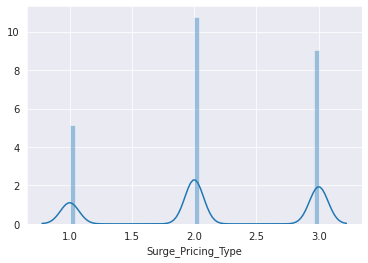

In [96]:
sns.distplot(train['Surge_Pricing_Type'])

In [97]:
distance=train.groupby('Trip_Distance')['Surge_Pricing_Type'].sum().reset_index()
distance

,Trip_Distance,Surge_Pricing_Type
0,0.31,1
1,1.53,1
2,1.54,3
3,1.55,4
4,1.56,6
...,...,...
10321,109.19,43
10322,109.20,36
10323,109.21,29
10324,109.22,29


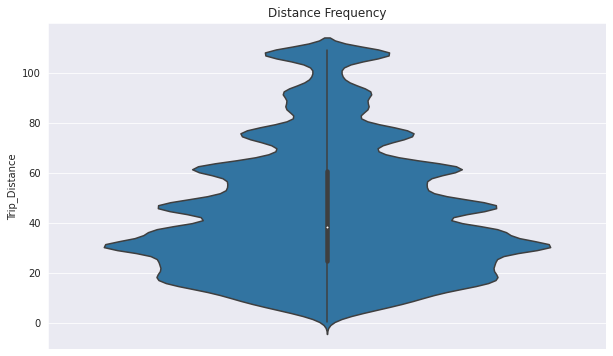

In [98]:
plt.figure(figsize=(10,6))
plt.title("Distance Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Trip_Distance"])
plt.show()

In [99]:
cab=train.groupby('Type_of_Cab')['Surge_Pricing_Type'].sum().reset_index()
cab

,Type_of_Cab,Surge_Pricing_Type
0,A,32617
1,B,59720
2,C,108577
3,D,52332
4,E,30584


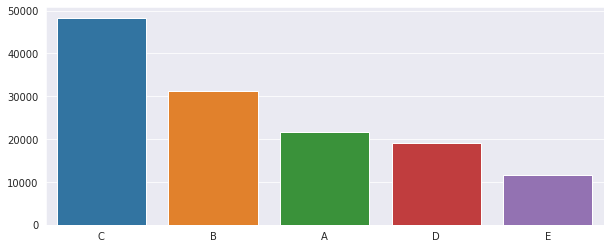

In [100]:
cab1 = train.Type_of_Cab.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=cab1.index, y=cab1.values)
plt.show()

In [101]:
train.Type_of_Cab=le.fit_transform(train.Type_of_Cab)
test.Type_of_Cab=le.fit_transform(test.Type_of_Cab)

In [102]:
cab2=train.groupby('Type_of_Cab')['Surge_Pricing_Type'].sum().reset_index()
cab2

,Type_of_Cab,Surge_Pricing_Type
0,0,32617
1,1,59720
2,2,108577
3,3,52332
4,4,30584


In [103]:
month=train.groupby('Customer_Since_Months')['Surge_Pricing_Type'].sum().reset_index()
month

,Customer_Since_Months,Surge_Pricing_Type
0,0,21533
1,1,17648
2,2,24854
3,3,21996
4,4,16510
5,5,18576
6,6,15997
7,7,16120
8,8,13628
9,9,11222


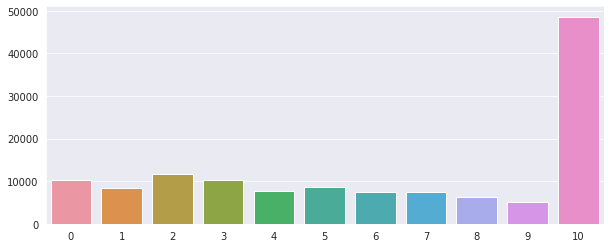

In [104]:
month1 = train.Customer_Since_Months.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=month1.index, y=month1.values)
plt.show()

In [105]:
ls_index=train.groupby('Life_Style_Index')['Surge_Pricing_Type'].sum().reset_index()
ls_index

,Life_Style_Index,Surge_Pricing_Type
0,1.59638,2
1,1.65696,2
2,1.67906,2
3,1.68789,2
4,1.73656,2
...,...,...
55973,4.59115,2
55974,4.65904,2
55975,4.69012,1
55976,4.85378,2


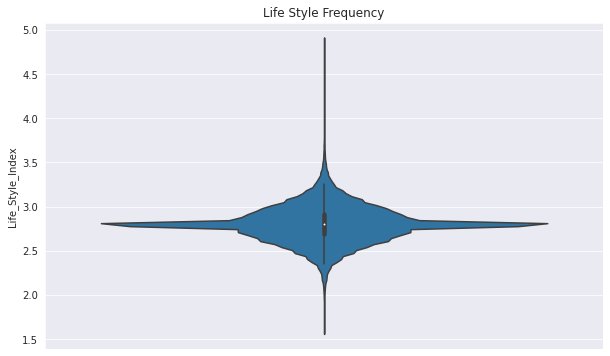

In [106]:
plt.figure(figsize=(10,6))
plt.title("Life Style Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Life_Style_Index"])
plt.show()

In [107]:
train.Life_Style_Index=train.Life_Style_Index.astype(int)
test.Life_Style_Index=test.Life_Style_Index.astype(int)

In [108]:
ls_index2=train.groupby('Life_Style_Index')['Surge_Pricing_Type'].sum().reset_index()
ls_index2

,Life_Style_Index,Surge_Pricing_Type
0,1,170
1,2,243611
2,3,40026
3,4,23


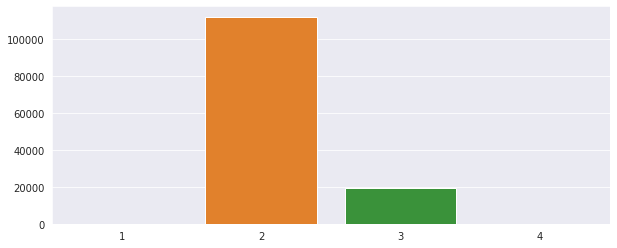

In [109]:
ls_index1 = train.Life_Style_Index.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=ls_index1.index, y=ls_index1.values)
plt.show()

In [110]:
conf=train.groupby('Confidence_Life_Style_Index')['Surge_Pricing_Type'].sum().reset_index()
conf

,Confidence_Life_Style_Index,Surge_Pricing_Type
0,A,68153
1,B,93928
2,C,121749


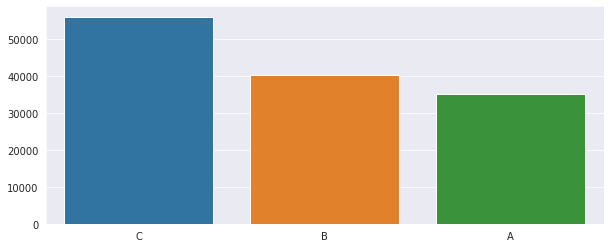

In [111]:
conf1 = train.Confidence_Life_Style_Index.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=conf1.index, y=conf1.values)
plt.show()

In [112]:
train.Confidence_Life_Style_Index=le.fit_transform(train.Confidence_Life_Style_Index)
test.Confidence_Life_Style_Index=le.fit_transform(test.Confidence_Life_Style_Index)

In [113]:
conf2=train.groupby('Confidence_Life_Style_Index')['Surge_Pricing_Type'].sum().reset_index()
conf2

,Confidence_Life_Style_Index,Surge_Pricing_Type
0,0,68153
1,1,93928
2,2,121749


In [114]:
dest=train.groupby('Destination_Type')['Surge_Pricing_Type'].sum().reset_index()
dest

,Destination_Type,Surge_Pricing_Type
0,A,171374
1,B,58030
2,C,15803
3,D,15784
4,E,5410
5,F,4698
6,G,2812
7,H,2956
8,I,1993
9,J,1624


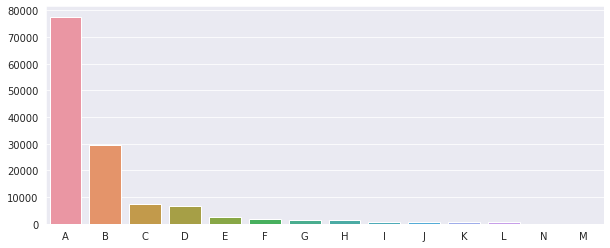

In [115]:
dest1 = train.Destination_Type.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=dest1.index, y=dest1.values)
plt.show()

In [116]:
train.Destination_Type=le.fit_transform(train.Destination_Type)
test.Destination_Type=le.fit_transform(test.Destination_Type)

In [117]:
dest1=train.groupby('Destination_Type')['Surge_Pricing_Type'].sum().reset_index()
dest1

,Destination_Type,Surge_Pricing_Type
0,0,171374
1,1,58030
2,2,15803
3,3,15784
4,4,5410
5,5,4698
6,6,2812
7,7,2956
8,8,1993
9,9,1624


In [118]:
c_rate=train.groupby('Customer_Rating')['Surge_Pricing_Type'].sum().reset_index()
c_rate

,Customer_Rating,Surge_Pricing_Type
0,0.00125,6
1,0.00250,2
2,0.00375,6
3,0.00625,3
4,0.00875,3
...,...,...
3926,4.99500,1
3927,4.99625,1
3928,4.99750,6
3929,4.99875,3


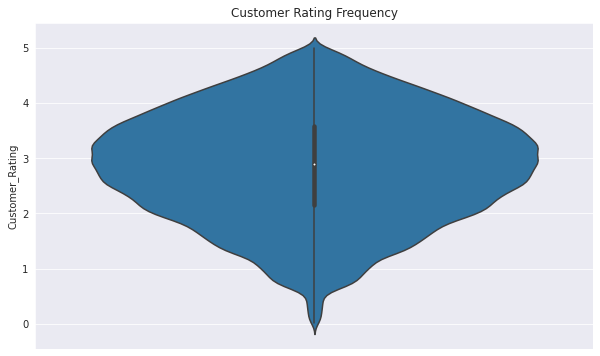

In [119]:
plt.figure(figsize=(10,6))
plt.title("Customer Rating Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Customer_Rating"])
plt.show()

In [120]:
train.Customer_Rating=train.Customer_Rating.astype(int)
test.Customer_Rating=test.Customer_Rating.astype(int)

In [121]:
c_rate2=train.groupby('Customer_Rating')['Surge_Pricing_Type'].sum().reset_index()
c_rate2

,Customer_Rating,Surge_Pricing_Type
0,0,11265
1,1,51736
2,2,96103
3,3,90990
4,4,33571
5,5,165


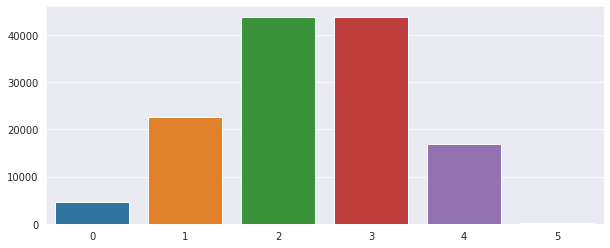

In [122]:
c_rate1 = train.Customer_Rating.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=c_rate1.index, y=c_rate1.values)
plt.show()

In [123]:
cancel=train.groupby('Cancellation_Last_1Month')['Surge_Pricing_Type'].sum().reset_index()
cancel

,Cancellation_Last_1Month,Surge_Pricing_Type
0,0,139286
1,1,82320
2,2,38113
3,3,17219
4,4,4516
5,5,1664
6,6,667
7,7,36
8,8,9


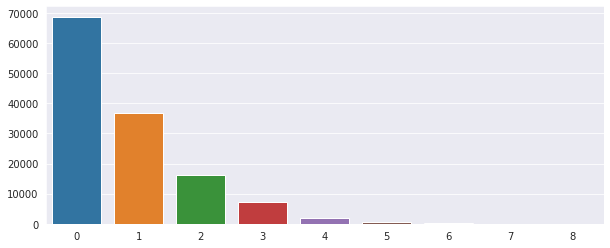

In [124]:
cancel1 = train.Cancellation_Last_1Month.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=cancel1.index, y=cancel1.values)
plt.show()

In [125]:
var1=train.groupby('Var1')['Surge_Pricing_Type'].sum().reset_index()
var1

,Var1,Surge_Pricing_Type
0,30,527
1,31,1001
2,32,1256
3,33,1360
4,34,1729
...,...,...
117,171,2
118,173,2
119,179,3
120,200,1


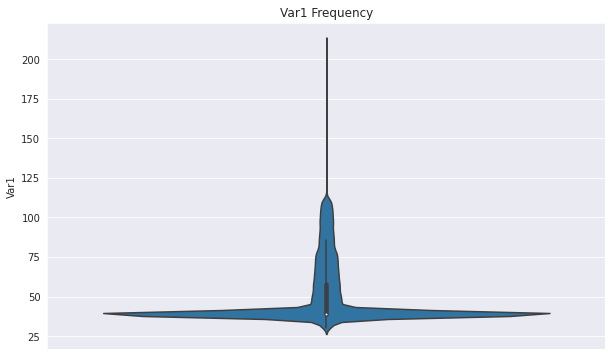

In [126]:
plt.figure(figsize=(10,6))
plt.title("Var1 Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Var1"])
plt.show()

In [127]:
var2=train.groupby('Var2')['Surge_Pricing_Type'].sum().reset_index()
var2

,Var2,Surge_Pricing_Type
0,40,8
1,41,60
2,42,1093
3,43,3249
4,44,7857
5,45,13003
6,46,18599
7,47,22494
8,48,25422
9,49,26805


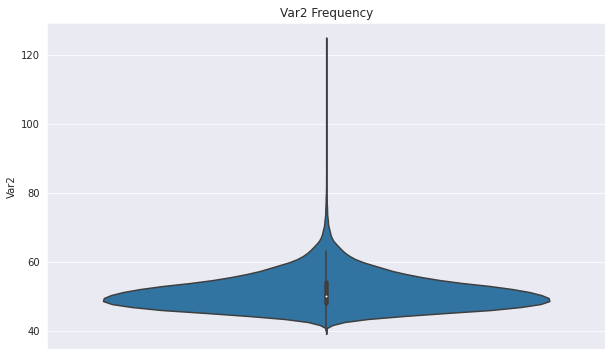

In [128]:
plt.figure(figsize=(10,6))
plt.title("Var2 Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Var2"])
plt.show()

In [129]:
var3=train.groupby('Var3')['Surge_Pricing_Type'].sum().reset_index()
var3

,Var3,Surge_Pricing_Type
0,52,26
1,53,225
2,54,910
3,55,1502
4,56,2407
...,...,...
91,147,3
92,155,8
93,166,2
94,174,2


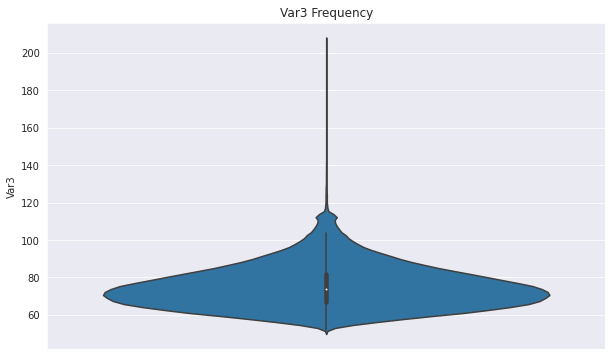

In [130]:
plt.figure(figsize=(10,6))
plt.title("Var3 Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Var3"])
plt.show()

In [131]:
gender=train.groupby('Gender')['Surge_Pricing_Type'].sum().reset_index()
gender

,Gender,Surge_Pricing_Type
0,Female,81367
1,Male,202463


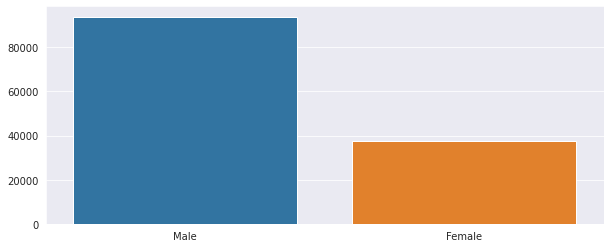

In [132]:
gender1 = train.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=gender1.index, y=gender1.values)
plt.show()

In [133]:
train.Gender=le.fit_transform(train.Gender)
test.Gender=le.fit_transform(test.Gender)

In [134]:
gender1=train.groupby('Gender')['Surge_Pricing_Type'].sum().reset_index()
gender1

,Gender,Surge_Pricing_Type
0,0,81367
1,1,202463


In [135]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  131662 non-null  int64  
 3   Customer_Since_Months        131662 non-null  int64  
 4   Life_Style_Index             131662 non-null  int64  
 5   Confidence_Life_Style_Index  131662 non-null  int64  
 6   Destination_Type             131662 non-null  int64  
 7   Customer_Rating              131662 non-null  int64  
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         131662 non-null  int64  
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  int64  
 13 

In [137]:
train

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,1,1,2,0,0,3,0,40,46,60,0,2
1,T0005689461,29.47,1,10,2,1,0,3,0,38,56,78,1,2
2,T0005689464,41.58,2,10,2,2,4,3,2,39,56,77,1,2
3,T0005689465,61.56,2,10,2,2,0,3,0,39,52,74,1,3
4,T0005689467,54.95,2,10,3,1,0,3,4,51,49,102,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,3,1,2,0,0,3,0,61,47,76,1,3
131658,T0005908510,74.81,2,7,2,2,0,0,0,39,63,88,1,2
131659,T0005908512,40.17,2,10,2,1,0,3,0,39,48,75,0,2
131660,T0005908513,46.88,1,4,3,0,1,4,1,47,54,79,1,2


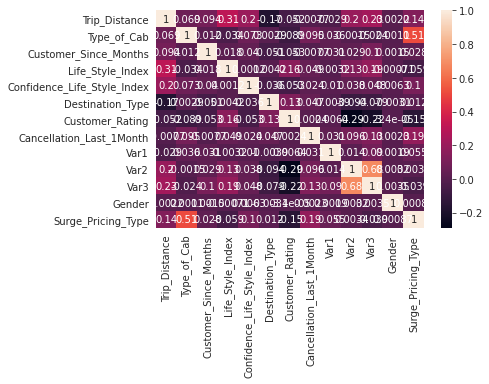

In [138]:
#create a heatmap to correlate promotion
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap, annot=True)

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  131662 non-null  int64  
 3   Customer_Since_Months        131662 non-null  int64  
 4   Life_Style_Index             131662 non-null  int64  
 5   Confidence_Life_Style_Index  131662 non-null  int64  
 6   Destination_Type             131662 non-null  int64  
 7   Customer_Rating              131662 non-null  int64  
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         131662 non-null  int64  
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  int64  
 13 

In [140]:
#set up features
features=['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months','Life_Style_Index', 'Confidence_Life_Style_Index','Destination_Type',
          'Customer_Rating', 'Cancellation_Last_1Month','Var1', 'Var2', 'Var3', 'Gender' ]
#set up target variable
train_labels = np.array(train.Surge_Pricing_Type.values.reshape(-1, 1))

In [141]:
#prepare data
y = train_labels
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [142]:
#bring all features to the same range
#sc_X=StandardScaler()
#X_train=sc_X.fit_transform(X_train)
#X_validation=sc_X.transform(X_validation)

In [143]:
#split train set for testing
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.1, random_state=1)

In [144]:
#Create an XGB classifier and instance of the same
clf = XGBClassifier(objective='multi:softprob')
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [145]:
clf.fit(X_train, Y_train)
clf

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [146]:
y_pred = clf.predict(X_validation)
y_pred

array([2, 2, 2, ..., 3, 2, 2])

In [147]:
#classification accuracy
print(metrics.accuracy_score(Y_validation, y_pred))

0.6907420065314802


In [151]:
# f1 score and recall score
f1_score(Y_validation, y_pred, average='weighted'), recall_score(Y_validation, y_pred, average='weighted')

(0.6857752231034772, 0.6907420065314802)

In [152]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(Y_validation, y_pred)

array([[1462, 1036,  298],
       [ 197, 4655,  753],
       [ 281, 1507, 2978]])

In [156]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(Y_validation, y_pred))
#Create DataFrame from confmtrx array 
pd.DataFrame(confmtrx, index=['1','2', '3'],
columns=['predicted_1', 'predicted_2', 'predicted_3'])

,predicted_1,predicted_2,predicted_3
1,1462,1036,298
2,197,4655,753
3,281,1507,2978


In [158]:
#Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(Y_validation, y_pred))  
#Create classification report
class_report=classification_report(Y_validation, y_pred)
print(class_report)

Accuracy Score: 0.6907420065314802
              precision    recall  f1-score   support

           1       0.75      0.52      0.62      2796
           2       0.65      0.83      0.73      5605
           3       0.74      0.62      0.68      4766

    accuracy                           0.69     13167
   macro avg       0.71      0.66      0.67     13167
weighted avg       0.70      0.69      0.69     13167



In [160]:
pred=clf.predict(X_validation)
pred

array([2, 2, 2, ..., 3, 2, 2])

In [161]:
#Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(Y_validation, pred))  

Accuracy Score: 0.6907420065314802


In [162]:
Y_validation=Y_validation.flatten()
pred=pred.flatten()

df=pd.DataFrame({'Actual': Y_validation, 'Predicted':pred})
df

,Actual,Predicted
0,2,2
1,1,2
2,2,2
3,3,2
4,2,2
...,...,...
13162,2,2
13163,2,2
13164,3,3
13165,2,2


In [163]:
predictions = clf.predict(X_test)
predictions=predictions.astype(int)
predictions

array([1, 2, 2, ..., 1, 2, 2])

In [164]:
output = pd.DataFrame({'Trip_ID': test.Trip_ID, 'Surge_Pricing_Type': predictions})
output

,Trip_ID,Surge_Pricing_Type
0,T0005689459,1
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2
...,...,...
87390,T0005908503,2
87391,T0005908504,2
87392,T0005908505,1
87393,T0005908511,2


In [165]:
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [166]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,Trip_ID,Surge_Pricing_Type
0,T0005689459,1
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2
...,...,...
87390,T0005908503,2
87391,T0005908504,2
87392,T0005908505,1
87393,T0005908511,2
